<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise_9_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3- Benchmark model with different types of non-linearity. Use
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(10,), activation=’relu’) to fit
deep neural network classifiers (DNNs) based on the lowest resolution data (100 ROIs
(n_rois)) using the first 90 subjects as the training set. Fit 5 different DNNs with latent
representations based on different kinds of non-linear transformation in the hidden layers of
the model: activation=’identity’, ‘logistic’, ‘tanh’, and ‘relu’. Next, evaluate each fitted DNNs
model on the unseen last 10% of the structural brain scans. Please plot the classification
accuracy on the training set and the test set (x axis=4 different activation functions of the
DNN architectures, y axis=prediction accuracy, 5 lines with 5 colors based on alpha=0.0001
/ 0.001 / 0.01 / 0.1 / 1.0; separate plots for train and test).

In [ ]:
%%capture
!pip install nilearn

In [ ]:
%%capture
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [ ]:
%%capture
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
%%capture
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# We import the data first in order to select the last 10 subjects
%%capture
brain_data = datasets.fetch_oasis_vbm(n_subjects=(100))
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(100)) # We fix this at 100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

In [ ]:
# We prepare the X matrix and y vector, and we scale X
X, y = input_variables, output_variable
X_scaled = scaler.fit_transform(X)

In [ ]:
# We create the train-test split by hand
train_indices = list(range(0,90))
test_indices = list(range(90,100))
# We combine both splits into one variable
split = [(train_indices, test_indices)] # for one fold

In [ ]:
%%capture
# We prepare the MLPRegressor model with the parameters we want fixed
mlp = MLPClassifier(max_iter=1000, random_state=42)
# We create a variable containing the parameter space we want to explore
parameters = {'activation': ('identity', 'logistic', 'tanh', 'relu'), 'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0]}
# We call the GridSearch estimator
clf = GridSearchCV(mlp,parameters,cv=split,return_train_score=True)
# We fit the GridSearch estimator on our data
clf.fit(X_scaled, y)

In [ ]:
# We store the results into a pandas dataframe
NN = pd.DataFrame(clf.cv_results_)

In [ ]:
# We retrieve the two columns of interest 
test_scores = np.array(NN["split0_test_score"])
train_scores = np.array(NN["split0_train_score"])

In [ ]:
# We divide the test data according to activation functions
a = test_scores[0:5]
b = test_scores[5:10]
c = test_scores[10:15]
d = test_scores[15:20]

In [ ]:
# We divide the training data according to activation functions
f = train_scores[0:5]
g = train_scores[5:10]
h = train_scores[10:15]
i = train_scores[15:20]

In [ ]:
# We regroup the results 
test_test_scores = np.array([a,b,c,d])
train_train_scores = np.array([f,g,h,i])

In [ ]:
# We reshape the results
test_test_scores = np.reshape(test_test_scores,(5, 4))
train_train_scores = np.reshape(train_train_scores,(5, 4))

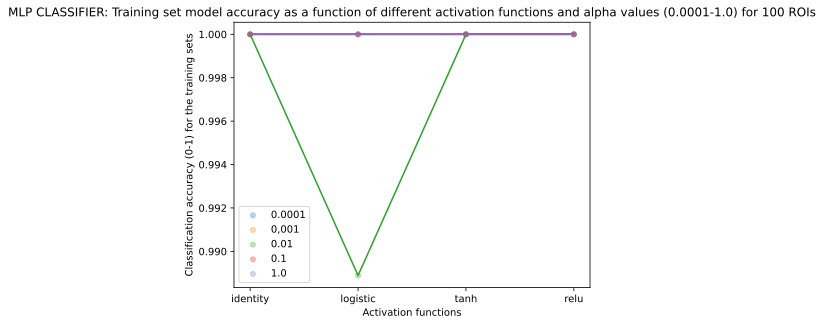

In [ ]:
# We're ready to plot the training scores!
act_funs = list(range(1,5))
lab = ['0.0001', '0,001', '0.01', '0.1', '1.0']
plt.style.use("default")
plt.scatter(act_funs,train_train_scores[0], s=25, alpha = 0.3, marker = 'o')
plt.scatter(act_funs,train_train_scores[1], s=25, alpha = 0.3, marker = 'o')
plt.scatter(act_funs,train_train_scores[2], s=25, alpha = 0.3, marker = 'o')
plt.scatter(act_funs,train_train_scores[3], s=25, alpha = 0.3, marker = 'o')
plt.scatter(act_funs,train_train_scores[4], s=25, alpha = 0.3, marker = 'o')
plt.legend(labels=(lab))
plt.gca().set(
    title="MLP CLASSIFIER: Training set model accuracy as a function of different activation functions and alpha values (0.0001-1.0) for 100 ROIs",
    xlabel="Activation functions",
    ylabel="Classification accuracy (0-1) for the training sets",
    xticks = act_funs,
    xticklabels = ('identity','logistic','tanh','relu')
)
plt.plot(act_funs,train_train_scores[0])
plt.plot(act_funs,train_train_scores[1])
plt.plot(act_funs,train_train_scores[2])
plt.plot(act_funs,train_train_scores[3])
plt.plot(act_funs,train_train_scores[4])
plt.show()

Except for the logistic activation function at a learning rate of 0.01, which yields an accuracy score of 0.9, all combinations yield perfect training performance.

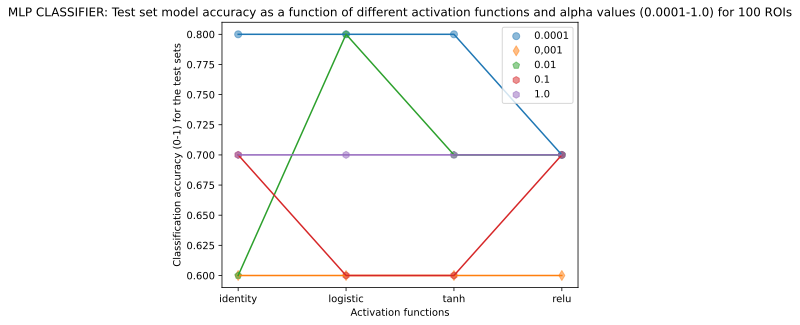

In [ ]:
# We're ready to plot the test scores!
act_funs = list(range(1,5))
lab = ['0.0001', '0,001', '0.01', '0.1', '1.0']
plt.style.use("default")
plt.scatter(act_funs,test_test_scores[0], s=50, alpha = 0.5, marker = 'o')
plt.scatter(act_funs,test_test_scores[1], s=50, alpha = 0.5, marker = 'd')
plt.scatter(act_funs,test_test_scores[2], s=50, alpha = 0.5, marker = 'p')
plt.scatter(act_funs,test_test_scores[3], s=50, alpha = 0.5, marker = 'h')
plt.scatter(act_funs,test_test_scores[4], s=50, alpha = 0.5, marker = 'h')
plt.legend(labels=(lab))
plt.gca().set(
    title="MLP CLASSIFIER: Test set model accuracy as a function of different activation functions and alpha values (0.0001-1.0) for 100 ROIs",
    xlabel="Activation functions",
    ylabel="Classification accuracy (0-1) for the test sets",
    xticks = act_funs,
    xticklabels = ('identity','logistic','tanh','relu')
)
plt.plot(act_funs,test_test_scores[0])
plt.plot(act_funs,test_test_scores[1])
plt.plot(act_funs,test_test_scores[2])
plt.plot(act_funs,test_test_scores[3])
plt.plot(act_funs,test_test_scores[4])
plt.show()

The results we should pick a the lowest possible learning rate for any activation function except ReLU if we want higher test set accuracy. Another option is to use the logistic function at 0.01, which yielded slightly lower results in the training, probably because it was not overfitting the data.